In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

from keras.models import load_model
from tensorflow.keras.optimizers import Adam 


In [5]:
lead_order = ["DI", "DII", "DIII", "AVL", "AVF", "AVR", "V1", "V2", "V3", "V4", "V5", "V6"]
df_attributes=pd.read_csv("attributes.csv")
path_data = "C:/Users/danih/OneDrive/Bureau/M2 MAPI3/Machine Learning/Projets/BIG_PROJECT"

df_goldStandard = pd.read_csv(f'{path_data}/data/data/annotations/gold_standard.csv')
df_goldStandard.rename(columns={"1dAVb":"Un_dAVb"},inplace=True)

df_card1= pd.read_csv(f'{path_data}/data/data/annotations/cardiologist1.csv')
df_card1.rename(columns={"1dAVb":"Und_AVb"},inplace=True)

df_card2= pd.read_csv(f'{path_data}/data/data/annotations/cardiologist2.csv')
df_card2.rename(columns={"1dAVb":"Und_AVb"},inplace=True)

df_dnn= pd.read_csv(f'{path_data}/data/data/annotations/dnn.csv')
df_dnn.rename(columns={"1dAVb":"Und_AVb"},inplace=True)


df_card_res= pd.read_csv(f'{path_data}/data/data/annotations/cardiology_residents.csv')
df_card_res.rename(columns={"1dAVb":"Und_AVb"},inplace=True)

df_emerg_res= pd.read_csv(f'{path_data}/data/data/annotations/emergency_residents.csv')
df_emerg_res.rename(columns={"1dAVb":"Un_dAVb"},inplace=True)

df_medical_students= pd.read_csv(f'{path_data}/data/data/annotations/medical_students.csv')
df_medical_students.rename(columns={"1dAVb":"Un_dAVb"},inplace=True)




df_dnn.drop('Unnamed: 0',axis=1,inplace=True)


# df=df_goldStandard.join(df_cardiologist1,lsuffix='_goldStandard', rsuffix='_card1').join(df_cardiologist2,
#     rsuffix='card_2').join(df_dnn,rsuffix='_dnn').join(df_cardiology_residents,rsuffix='_card_res').join(
#     df_emergency_residents,rsuffix='_emerg_res').join(df_medical_students,rsuffix='_med_stud').join(df_attributes)


df_goldStandard['nb_abnormality'] =  df_goldStandard.sum(axis=1)

In [6]:
df_goldStandard

,Un_dAVb,RBBB,LBBB,SB,AF,ST,nb_abnormality
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
822,0,0,0,0,0,0,0
823,0,0,0,0,0,0,0
824,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0


In [7]:

with h5py.File(f"{path_data}/data/data/ecg_tracings.hdf5", "r") as f:
    x = np.array(f['tracings'])
print(x.shape)


(827, 4096, 12)


## Modèle pré-entrainé pour réseaux de neurones

In [8]:
model = load_model(f"{path_data}/model/model/model.hdf5", compile=False)
model.compile(loss='binary_crossentropy', optimizer=Adam())

for layer in model.layers:
    print(layer.output_shape)
print(model.summary())

[(None, 4096, 12)]
(None, 4096, 64)
(None, 4096, 64)
(None, 4096, 64)
(None, 4096, 128)
(None, 4096, 128)
(None, 4096, 128)
(None, 4096, 128)
(None, 1024, 64)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 196)
(None, 1024, 196)
(None, 1024, 196)
(None, 1024, 196)
(None, 256, 128)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 256)
(None, 256, 256)
(None, 256, 256)
(None, 256, 256)
(None, 64, 196)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 320)
(None, 64, 320)
(None, 64, 320)
(None, 64, 320)
(None, 16, 256)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 5120)
(None, 6)
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape   

In [9]:
y_pred = model.predict(x,verbose = 1)



26/26 [==============================] - 28s 1s/step


In [10]:
ind = np.linspace(0,826,827)

df_pred = pd.DataFrame(y_pred, index = ind,columns=['Proba_1dAVb','Proba_RBBB','Proba_LBBB','Proba_SB','Proba_AF','Proba_ST'])

display(df_pred)    #prédictions du réseau de neurones sur le modèle pré-entrainé

,Proba_1dAVb,Proba_RBBB,Proba_LBBB,Proba_SB,Proba_AF,Proba_ST
0.0,1.424320e-06,1.071004e-07,2.633703e-07,4.537750e-07,9.485395e-07,6.413525e-09
1.0,2.889732e-02,2.006710e-03,3.177863e-01,2.827818e-05,4.834345e-02,3.205240e-04
2.0,3.112853e-04,2.940376e-05,4.175250e-06,1.971315e-05,9.349018e-03,2.493309e-05
3.0,2.396912e-09,1.734494e-09,6.939355e-10,8.173876e-10,5.682145e-09,2.767275e-10
4.0,5.306005e-04,3.533459e-06,3.394174e-07,1.430142e-06,2.242625e-04,4.707765e-06
...,...,...,...,...,...,...
822.0,2.662169e-06,2.271635e-07,1.546323e-07,1.969674e-07,1.191892e-05,3.100990e-08
823.0,4.383028e-04,1.032207e-05,1.012705e-04,4.085054e-08,8.352697e-04,6.998936e-07
824.0,6.078317e-07,3.985351e-08,1.985758e-08,1.092500e-08,1.017582e-06,3.607297e-08
825.0,3.941979e-08,2.405508e-09,8.350511e-10,9.778340e-09,6.802806e-08,3.952344e-09


## Précisions des différents étudiants/médecins par rapport au gold standard
On compare le nombre d'anomalies prédites par les différents étudiants/médecins par rapport au gold standard

In [96]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [50]:
y_true = df_goldStandard['nb_abnormality']


print('pourcentage de patient ayant aucune anomalie',len(y_true[y_true==0])/len(y_true)*100)
print('pourcentage de patient ayant 1 anomalie',len(y_true[y_true==1])/len(y_true)*100)
print('pourcentage de patient ayant 2 anomalies',len(y_true[y_true==2])/len(y_true)*100)
print('pourcentage de patient ayant + de 2 anomalies',len(y_true[y_true>2])/len(y_true)*100)

pourcentage de patient ayant aucune anomalie 82.34582829504232
pourcentage de patient ayant 1 anomalie 16.203143893591292
pourcentage de patient ayant 2 anomalies 1.4510278113663846
pourcentage de patient ayant + de 2 anomalies 0.0


In [21]:

y_pred_card1=df_card1.sum(axis=1)


print('F1 score du cardiologist 1=', f1_score(y_true,y_pred_card1,average='weighted'))
confusion_matrix(y_true,y_pred_card1)

F1 score du cardiologist 1= 0.9654864414968609


array([[674,   7,   0],
       [ 19, 114,   1],
       [  0,   1,  11]], dtype=int64)

In [31]:
y_pred_card2=df_card2.sum(a

print('F1 score du cardiologist 2=', f1_score(y_true,y_pred_card2,average='weighted'))
confusion_matrix(y_true,y_pred_card2)

F1 score du cardiologist 2= 0.9804184976636632


array([[677,   3,   1],
       [ 12, 122,   0],
       [  0,   0,  12]], dtype=int64)

In [32]:
y_pred_dnn=df_dnn.sum(axis=1)


print('F1 score du réseau de neurones=', f1_score(y_true,y_pred_dnn,average='weighted'))
confusion_matrix(y_true,y_pred_dnn)

F1 score du réseau de neurones= 0.9763569011176221


array([[674,   7,   0],
       [  6, 122,   6],
       [  0,   1,  11]], dtype=int64)

In [33]:
y_pred_card_res=df_card_res.sum(axis=1)


print('F1 score des 2 résidents en cardiologie=', f1_score(y_true,y_pred_card_res,average='weighted'))
confusion_matrix(y_true,y_pred_card_res)

F1 score des 2 résidents en cardiologie= 0.959424594726542


array([[672,   9,   0],
       [ 17, 114,   3],
       [  1,   3,   8]], dtype=int64)

In [34]:
y_pred_emerg_res=df_emerg_res.sum(axis=1)


print('F1 score des 2 urgentistes résidents=', f1_score(y_true,y_pred_emerg_res,average='weighted'))
confusion_matrix(y_true,y_pred_emerg_res)

F1 score des 2 urgentistes résidents= 0.9525956775606055


array([[664,  17,   0],
       [ 17, 115,   2],
       [  3,   0,   9]], dtype=int64)

In [52]:
y_pred_med_stud=df_medical_students.sum(axis=1)


print('F1 score des 2 étudiants en médecine=', f1_score(y_true,y_pred_med_stud,average='weighted'))
confusion_matrix(y_true,y_pred_med_stud)



F1 score des 2 étudiants en médecine= 0.9460800081880871


array([[664,  13,   4,   0],
       [ 13, 106,  14,   1],
       [  1,   2,   9,   0],
       [  0,   0,   0,   0]], dtype=int64)

## Apprentissage supervisé

On peut également entraîner des classifieurs SVC, LogisticRegression, RandomForest pour comparer les résultats

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


In [48]:
dx, dy, dz = x.shape                     #On redimensionne les données d'entrainement X

X = x.reshape(dx, dy * dz)

X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.407469,-0.397223,0.211611,0.178307,1.942285,2.809755,1.25819,1.202997,1.659529,-0.759827
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y_true, train_size = 0.8)


In [74]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
from sklearn.preprocessing import StandardScaler  
# On normalise les données 
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)


## Régression logistique

In [76]:
C=0.2
Classifier1 = LogisticRegression(penalty="l1",C=C,
                              solver="liblinear")

logitCoef=Classifier1.fit(Xr_train,y_train).coef_
print(logitCoef)

coef = pd.Series(logitCoef[0], index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

coef


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Lasso conserve 202 variables et en supprime 48950


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49147    0.0
49148    0.0
49149    0.0
49150    0.0
49151    0.0
Length: 49152, dtype: float64

In [77]:
C=5
Classifier1 = LogisticRegression(penalty="l1",C=C,
                              solver="liblinear")

logitCoef=Classifier1.fit(Xr_train,y_train).coef_
print(logitCoef)

coef = pd.Series(logitCoef[0], index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

coef

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Lasso conserve 874 variables et en supprime 48278


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49147    0.0
49148    0.0
49149    0.0
49150    0.0
49151    0.0
Length: 49152, dtype: float64

In [78]:
C=100
Classifier1 = LogisticRegression(penalty="l1",C=C,
                              solver="liblinear")

logitCoef=Classifier1.fit(Xr_train,y_train).coef_
print(logitCoef)

coef = pd.Series(logitCoef[0], index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

coef

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Lasso conserve 3012 variables et en supprime 46140


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49147    0.0
49148    0.0
49149    0.0
49150    0.0
49151    0.0
Length: 49152, dtype: float64

In [80]:
from sklearn.model_selection import GridSearchCV
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[0.2, 1,10,30,50,100]}]
logit = GridSearchCV(LogisticRegression(penalty="l1", solver = "liblinear"), param,cv=5,n_jobs=-1)
logitOpt=logit.fit(Xr_train, y_train)
# paramètre optimal
# paramètre optimal

print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.192139, Meilleur paramètre = {'C': 0.2}


In [84]:
C=logitOpt.best_params_["C"]                #best logistic regression model                             
typePenal="l1"
nproc=-1
logit = LogisticRegression(penalty=typePenal, dual=False, tol=0.0001, 
            C=C, fit_intercept=True, intercept_scaling=1, 
            class_weight=None, random_state=None, solver='liblinear', 
            max_iter=100, multi_class='ovr', verbose=0, 
            warm_start=False, n_jobs=nproc)
logitFit=logit.fit(Xr_train, y_train)
y_logit_pred = logitFit.predict(Xr_test)

C:\Users\danih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


In [85]:
#On mesure le score sur les données test


print('F1 score de la regression logistique=', f1_score(y_test,y_logit_pred,average='weighted'))
confusion_matrix(y_test,y_logit_pred)


F1 score de la regression logistique= 0.7890130378499697


array([[138,   4,   0],
       [ 21,   1,   0],
       [  2,   0,   0]], dtype=int64)

Il semblerait que ce modèle ne parvienne pas à correctement identifier les patients ayant des anomalies, il prédit 97% des patients comme ayant aucune anomalie.

## SupportVectorClassifier

In [102]:
svc = LinearSVC(random_state = 0)
svc.fit(Xr_train,y_train)

C:\Users\danih\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=0)

In [103]:
y_svc_pred = svc.predict(Xr_test)

In [106]:
#On mesure le score sur les données test

print('F1 score du linearSVC=', f1_score(y_test,y_svc_pred,average='weighted'))
confusion_matrix(y_test,y_svc_pred)

F1 score du linearSVC= 0.7424134948249907


array([[118,  23,   1],
       [ 17,   3,   2],
       [  1,   1,   0]], dtype=int64)

Ici aussi, le modèle semble avoir du mal à bien prédire les anomalies.

## RandomForest

In [107]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(Xr_train,y_train)

RandomForestClassifier(random_state=0)

In [108]:
y_RF_pred = RF.predict(Xr_test)

In [109]:
#On mesure le score sur les données test

print('F1 score du RFC=', f1_score(y_test,y_RF_pred,average='weighted'))
confusion_matrix(y_test,y_RF_pred)

F1 score du RFC= 0.8015168872210151


array([[141,   1,   0],
       [ 21,   1,   0],
       [  1,   1,   0]], dtype=int64)

Encore une fois le modèle ne prédit presque jamais qu'un patient a une anomalie.


**Conclusion :** Il semblerait que les classifieurs classiques pour l'apprentissage supervisé ne soient pas performants pour prédire quand un patient est atteint d'une anomalie.
Peut-être faut-il jouer sur les paramètres pour obtenir de meilleures prédictions?
Peut-être qu'on peut effectuer une ACP pour éliminer les variables inutiles ? Peut-être qu'un clustering sera plus efficace ?

# ACP

<AxesSubplot:>

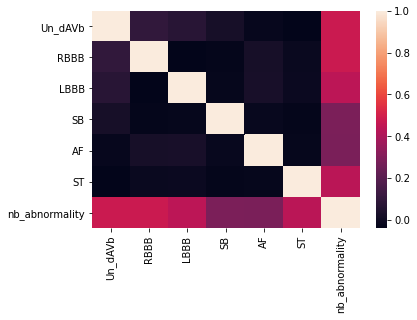

In [113]:
import seaborn as sns

sns.heatmap(df_goldStandard.corr())   #Corrélation entre les anomalies

Il semblerait que les anomalies soient relativement peu corrélées entres elles

In [129]:
from sklearn.decomposition import PCA



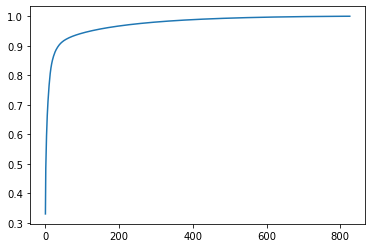

In [135]:
model = PCA()
X_reduced= model.fit_transform(X)
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [136]:
X_reduced.shape

(827, 827)

In [137]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)   

425

On garde 99% de la variance avec seulement 425 features

In [139]:
X_reduced = pd.DataFrame(X_reduced)

,0,1,2,3,4,5,6,7,8,9,...,817,818,819,820,821,822,823,824,825,826
0,-8.302910,13.115261,3.070312,1.609468,-1.528234,-1.144516,0.086531,-0.683829,1.335477,-2.414057,...,-0.064021,-0.109689,-0.046761,0.516789,0.228357,0.111523,0.136346,-0.259369,0.000940,1.332275e-14
1,-24.292273,162.766072,-37.109720,87.372886,-4.320288,-118.867879,-69.213111,10.222081,10.224597,8.196486,...,-0.046172,-0.138531,0.031055,0.011751,0.025131,0.229335,0.132184,-0.005385,-0.000115,1.332275e-14
2,-8.162659,12.885106,2.472807,0.899353,-0.493598,-0.905827,-0.441227,-2.047665,-1.266835,0.153921,...,0.791928,-0.572866,-0.326748,-0.742220,0.553856,1.051031,0.228749,0.290152,-0.002395,1.332275e-14
3,-8.436321,12.621942,3.044800,1.420967,-1.364358,-0.969433,-0.460491,-2.065014,-0.168198,-1.568945,...,-1.151660,0.057781,0.285725,0.559163,0.355292,0.068300,0.331360,-0.405980,0.001709,1.332275e-14
4,-8.319026,13.231013,2.433977,1.000133,-1.201106,-1.223011,-0.204855,-1.593515,-0.667685,-0.410360,...,0.577982,0.704623,0.307943,0.606673,-0.590142,-0.428777,0.014704,0.075435,-0.004936,1.332275e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,-8.375343,13.601525,2.427110,1.246592,-1.504467,-0.377082,-0.398361,0.044343,1.990470,0.416474,...,0.793367,-0.321626,-0.629262,0.798691,-0.209335,1.124360,-0.048739,-0.595422,-0.004466,1.332275e-14
823,-7.816766,12.762692,2.235708,0.911167,-1.028325,-0.958366,-0.116489,-0.246163,0.038225,1.044430,...,0.046719,0.029748,-0.244456,0.073355,-0.187164,0.063603,-0.026707,0.145744,-0.000592,1.332275e-14
824,-7.757031,13.473473,2.072325,-0.044633,-1.734136,-1.330659,-0.143922,-1.720592,-1.114519,-0.401865,...,0.061034,0.038604,-0.099884,0.054667,-0.002805,-0.060626,0.126126,0.318818,-0.003586,1.332275e-14
825,-8.329909,13.337693,2.535648,0.801219,-1.123718,-1.119133,-0.285502,-1.809556,0.015952,0.069577,...,-0.216825,-0.627946,0.150703,0.196883,0.162514,0.338568,-0.370584,-1.067648,0.001292,1.332275e-14


## Clustering

In [148]:
from sklearn.cluster import KMeans

In [149]:
kmeans = KMeans (n_clusters = 3)   #3 classes 0, 1 et 2

y_cluster_pred =kmeans.fit_predict(X)



In [151]:
#On mesure le score sur les données test

print('F1 score du Clustering=', f1_score(y_true,y_cluster_pred,average='weighted'))
confusion_matrix(y_true,y_cluster_pred)

F1 score du Clustering= 0.7195446459912288


array([[595,  66,  20],
       [116,  14,   4],
       [ 11,   1,   0]], dtype=int64)